1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

In [2]:
m = np.arange(12).reshape((3,4))
print(m)
print('The total mean : ', np.mean(m))
#Depending on the axis, we calculate a different mean
print('The mean of the colums :',  np.mean(m, axis = 0))
print('The mean of the rows :', np.mean(m, axis = 1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
The total mean :  5.5
The mean of the colums : [4. 5. 6. 7.]
The mean of the rows : [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
#outer in numpy
print("Using outer :\n ",  np.outer(u,v))

#outer with a for loop
print("\nUsing a for loop :")
res = []
for i in u: 
    res.append(i*v)
print(np.array(res))
        
#outer with broadcasting operations
print("\nUsing numpy broadcasting operations : ",)
#we modify the u matrix from a line to a colum to use broadcasting operations
print(u[:,np.newaxis]*v)

Using outer :
  [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Using a for loop :
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Using numpy broadcasting operations : 
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [4]:
import numpy.random as npr
#We use uniform function to have a flat distribution
a =  npr.uniform(size=(10,6), low = 0, high = 3)
print(a)

#we create mask for all numbers < 0.3
mask = (a < 0.3)
filtered_a = a[mask]
print("The filtered matrix : \n", filtered_a)


[[1.2542873  1.35455999 0.76971108 1.70779412 1.80530306 2.17806637]
 [0.50215283 2.22801433 0.0915695  2.9438228  0.58295682 1.13655498]
 [1.40382444 1.89271345 0.06613571 1.38479406 1.60665825 1.17071847]
 [0.78144369 2.13834958 1.6372948  2.95195801 2.60168906 0.37829031]
 [2.79212329 2.93087558 2.66069756 2.68866326 1.90665319 0.60085994]
 [0.60764368 2.89459193 1.53652029 2.39873073 0.77090904 1.38219967]
 [1.26601815 0.67477436 2.61571047 1.99693945 1.81591339 2.26936588]
 [0.69813905 2.00945795 0.16801189 2.82992273 0.18105209 2.04514093]
 [2.48465935 1.27383282 0.96962687 0.09818856 0.17919642 1.84753459]
 [2.85699289 0.56158923 1.88590905 1.50472148 0.74150326 2.95731571]]
The filtered matrix : 
 [0.0915695  0.06613571 0.16801189 0.18105209 0.09818856 0.17919642]


4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

An array of 100 numbers between 0 and 2pi : 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.3946

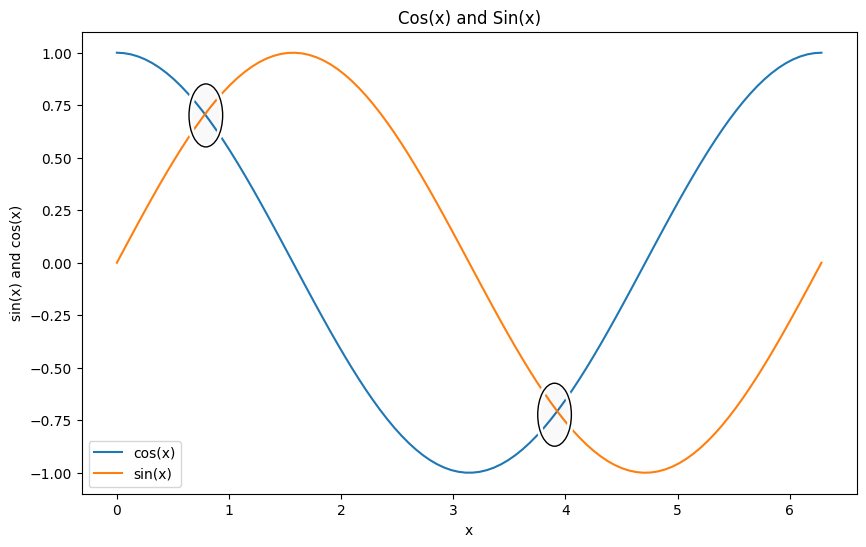

In [5]:
import math
from matplotlib import pyplot as plt

#we create an array of 100 numbers between 0 and 2pi (inclusive)
a = np.linspace(0,np.pi*2, 100)
print("An array of 100 numbers between 0 and 2pi : \n",a)
print("\n Every 10th element using the slice notation : \n",a[::10])
print("\nReverse : \n", a[::-1])

#cos and sin functions
cos = np.cos(a)
sin = np.sin(a)

#we create a mask 
mask = ( np.abs((sin - cos)) < 0.1)
#we apply the mask 
print("\n Filtered array : \n", a[mask])

#the function circle of the course 07_visualization
def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    ax = fig.axes[0]
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)
    
fig = plt.figure(figsize=(10, 6)) 
plt.plot(a, cos, a,sin)
plt.title("Cos(x) and Sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x) and cos(x)")
plt.legend(['cos(x)', 'sin(x)'])

v1 = (a[mask][0] + a[mask][1])/2
v2 = (a[mask][2] + a[mask][3])/2
circle(v1, np.cos(v1))
circle(v2, np.cos(v2))
plt.show()

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
#10x10 matrix : multiplication table
arr = np.array([i*j for i in np.linspace(1,10, 10) for j in np.linspace(1,10, 10)]).reshape(10,10)
print(arr, '\n')

print("Trace of the matrix \n : ", np.trace(arr))

#we fliplr so that we have the anti-diagonal matrix
print("\n Diagonal \n : ", np.fliplr(arr).diagonal())

print("\n Diagonal with offset by 1 upwards \n : ", np.diagonal(arr, 1))

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]] 

Trace of the matrix 
 :  385.0

 Diagonal 
 :  [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]

 Diagonal with offset by 1 upwards 
 :  [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [7]:
#positions in miles
a = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
#creating b for broadcasting
b = a[:,np.newaxis]
dist = np.absolute(a-b)
print("Broadcasting : \n", dist) #we have 10 cities so the 2D grid is 10*10

#conversion to km :  1 mile is equal to 1.609344 kilometres
print("\nDistance in km : \n", dist*1.609344)

Broadcasting : 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Distance in km : 
 [[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496  3621.024   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384  3452.04288 ]
 [1184.477184  865.827072  696.845952    0.        217.2614

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
import numpy.ma as ma
import timeit
def prime_numbers(n):
    #we start on 2 because we are searching for prime numbers
    a = np.arange(n+1)
    
    #Constract a shape (N,) boolean array which is the mask
    mask = ma.make_mask( a)
    
    #0 and 1 are not prime numbers
    mask[0] = mask[1] = False
    
    #Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
    for i in a[2:]: 
        for k in range(2, i):
            if (i % k ) == 0:
                mask[i] = False
                break
            else:
                mask[i] = True

    #Apply the mask to obtain an array of ordered prime numbers
    return (a[mask])

def sieve_of_eratosthenes(n):
    #we start on 2 because we are searching for prime numbers
    a = np.arange(n+1)
    
    #creating the mask
    mask = ma.make_mask( a)
    
    #0 and 1 are not prime numbers
    mask[0] = mask[1] = False
    
    #sieve of Eratosthenes
    for i in a[2:]:
        if (mask[i] == True):
            #we want to delete every 2nd number after 2, 3rd number after 3...
            for k in range(i*i, n+1, i):
                mask[k] = False

    #Apply the mask to obtain an array of ordered prime number
    return (a[mask])

    
print(prime_numbers(99))

#The larger N is, the greater the computation time is because we must calculate for a larger number N
t_temp = timeit.timeit('prime_numbers(99)', globals=globals(), number=1)
print("N = 99, time : ",t_temp)
t_temp = timeit.timeit('prime_numbers(999)', globals=globals(), number=1)
print("N = 999, time : ",t_temp)
t_temp = timeit.timeit('prime_numbers(9999)', globals=globals(), number=1)
print("N = 999, time : ",t_temp)

print(sieve_of_eratosthenes(99))
#it is faster using siece_of_eratosthenes
t_temp = timeit.timeit('sieve_of_eratosthenes(99)', globals=globals(), number=1)
print("N = 99, time : ",t_temp)
t_temp = timeit.timeit('sieve_of_eratosthenes(999)', globals=globals(), number=1)
print("N = 999, time : ",t_temp)
t_temp = timeit.timeit('sieve_of_eratosthenes(9999)', globals=globals(), number=1)
print("N = 999, time : ",t_temp)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
N = 99, time :  0.002143617000001541
N = 999, time :  0.029342976999998882
N = 999, time :  1.2490583960000095
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
N = 99, time :  0.0003198519999898508
N = 999, time :  0.0027207219999922927
N = 999, time :  0.07357238800000232


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

2D array walkers x steps : 
  [[ 1  1  1 ...  1 -1 -1]
 [ 1 -1  1 ...  1 -1  1]
 [ 1  1  1 ... -1 -1  1]
 ...
 [-1  1 -1 ...  1 -1  1]
 [ 1 -1 -1 ...  1 -1 -1]
 [ 1 -1 -1 ...  1 -1  1]]

 Walking distances 
 [-14  -4  10 -14  10   2  12   0  -4 -54  28 -14  12   4 -20  14 -10   8
  12 -16   0 -14  -6   0  24 -16  10  -2  -4   2  10  -8 -16  14  32   4
  -2  -4   2  12   8  -6   8 -34  -8 -18 -16   0  10 -14 -20  -2  24  10
   6 -34  22   6  24  10 -20  14  10  -6   8   4  32 -26 -12   4 -12 -16
  -4  -8   0 -30  -8 -18 -20 -22  -8 -16  10 -18   6 -24  14  10   6  -4
  -2  -2 -20  14 -10 -16 -16 -14  16 -14   4  20   8  -2  -8 -24   0 -16
  -8 -26  -2   8   0  10  10  12   8  18 -16 -22  20 -32  16 -10  20   0
 -14   6  -4 -12   0 -12  -4   6 -20  22  -6  -4  -6  -4  -2  -4  10  16
 -24 -22  10   4 -24 -18  14 -10  12  42  -4  -2   6  -8  -8  -2 -12  -6
  10  -2   8  -8 -36   0 -32   4 -10  22   8   0   6  14  14  32  30  16
   2  22  16 -16 -22  16  26  26  -6  34  -2  -8  -6   6  16  

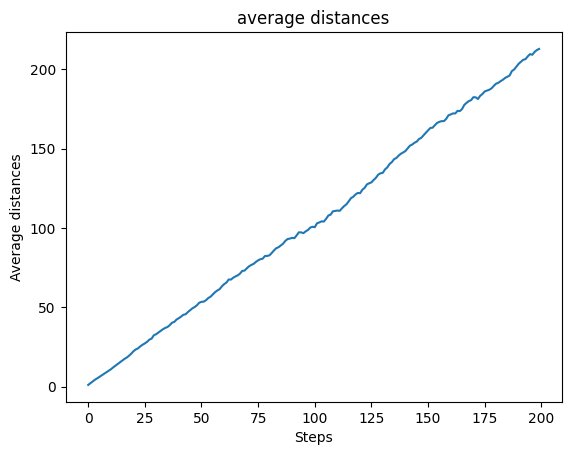

In [9]:
import numpy.random as npr
from matplotlib import pyplot as plt
#2D array of size walkers x steps with values -1 or 1
arr = 2*npr.randint(0, 2, size=(1000, 200))-1

print("2D array walkers x steps : \n ", arr)

walking_dist = np.sum(arr, axis = 1)
print("\n Walking distances \n", walking_dist)

walking_dist_square = np.square(walking_dist)
print("\nSquare of walking dist\n", walking_dist_square)

#square the distance at each step
steps = np.cumsum(arr, axis = 1)
steps_distance_square = np.square(steps)
#the mean along the columns
mean_step_square = np.mean(steps_distance_square, axis = 0)
print("The mean of the squared distances at each step : \n", mean_step_square)

#we have 200 steps 
plt.title("average distances")
plt.plot(np.arange(200), mean_step_square)
plt.xlabel("Steps")
plt.ylabel("Average distances")
plt.show()